In [43]:
import polars as pl
from matplotlib import pyplot as plt

In [44]:
data=pl.read_parquet('/home/ming/GraduateProject/Data/news.parquet')

In [45]:
data.head()

news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
str,str,str,str,str,str,list[struct[6]],list[struct[6]]
"""N60025""","""lifestyle""","""lifestylecelebstyle""","""Jason Momoa's Suit Shimmers Li…","""My newly edited criteria for f…","""https://assets.msn.com/labs/mi…","[{""Jason Momoa"",""P"",""Q315271"",1.0,[0],[""Jason Momoa""]}, {""Champagne"",""C"",""Q134862"",0.923,[33],[""Rosé Champagne""]}]",[]
"""N129849""","""movies""","""movienews""","""WATCH: Final Trailer For 'Star…","""After more than four decades, …","""https://assets.msn.com/labs/mi…","[{""Star Wars: The Rise of Skywalker"",""N"",""Q20977110"",1.0,[26],[""Star Wars: The Rise Of Skywalker""]}]","[{""Skywalker family"",""R"",""Q54311"",0.982,[34],[""Skywalker""]}, {""Star Wars (film)"",""W"",""Q17738"",1.0,[],[]}]"
"""N64948""","""sports""","""football_ncaa""","""It's Bama Time! LSU can now fo…","""The No. 1 and undefeated Tiger…","""https://assets.msn.com/labs/mi…","[{""LSU Tigers football"",""F"",""Q6460028"",0.994,[16],[""LSU""]}, {""University of Alabama"",""O"",""Q492318"",0.939,[5, 72],[""Bama"", ""Alabama""]}]","[{""LSU Tigers football"",""F"",""Q6460028"",0.994,[25],[""Tigers""]}, {""University of Alabama"",""O"",""Q492318"",0.939,[80],[""Alabama""]}, … {""Baton Rouge, Louisiana"",""G"",""Q28218"",1.0,[],[]}]"
"""N27599""","""news""","""newsus""","""15 things at the American Drea…","""The American Dream mall is ope…","""https://assets.msn.com/labs/mi…","[{""American Dream Meadowlands"",""F"",""Q464002"",0.995,[17],[""American Dream""]}]","[{""Nickelodeon Universe"",""F"",""Q3339833"",1.0,[124],[""Nickelodeon Universe""]}, {""American Dream Meadowlands"",""F"",""Q464002"",0.995,[4, 76],[""American Dream"", ""Meadowlands""]}, {""National Hockey League"",""O"",""Q1215892"",0.998,[170],[""NHL""]}]"
"""N107145""","""weather""","""weathertopstories""","""Venice swamped by highest tide…","""Homes and businesses were floo…","""https://assets.msn.com/labs/mi…","[{""Venice"",""G"",""Q641"",1.0,[0],[""Venice""]}]","[{""Venice"",""G"",""Q641"",1.0,[164],[""Venice""]}, {""Italy"",""G"",""Q38"",0.997,[172],[""Italy""]}]"


In [46]:
title_len = data.select(
    pl.col("title").fill_null('').str.split(' ').list.len()
).to_series()
title_len

title
u32
15
11
24
13
10
…
11
23
7


In [47]:
abstract_len = data.select(
    pl.col("abstract").fill_null('').str.split(' ').list.len()
).to_series()
title_len

title
u32
15
11
24
13
10
…
11
23
7


In [48]:
vc=data['category'].value_counts()

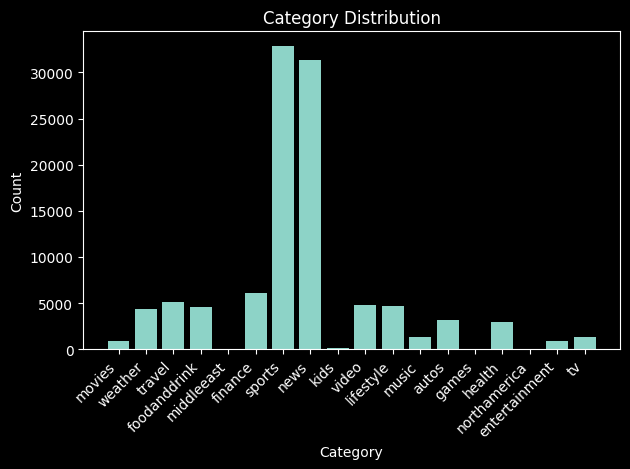

In [49]:
categories = vc["category"].to_list()
counts = vc["count"].to_list()

plt.figure()
plt.bar(categories, counts)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

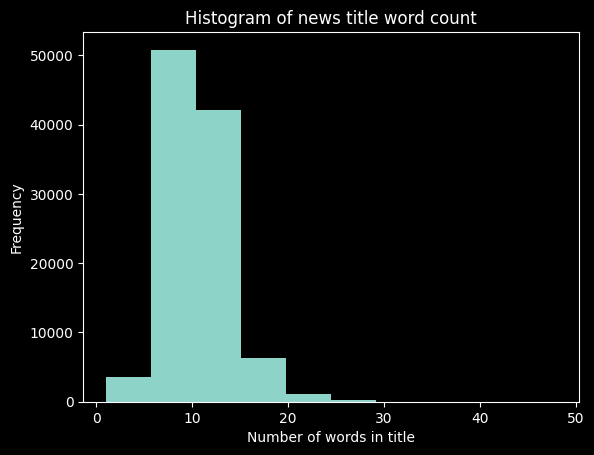

In [50]:
plt.figure()
plt.hist(title_len)
plt.xlabel("Number of words in title")
plt.ylabel("Frequency")
plt.title("Histogram of news title word count")
plt.show()

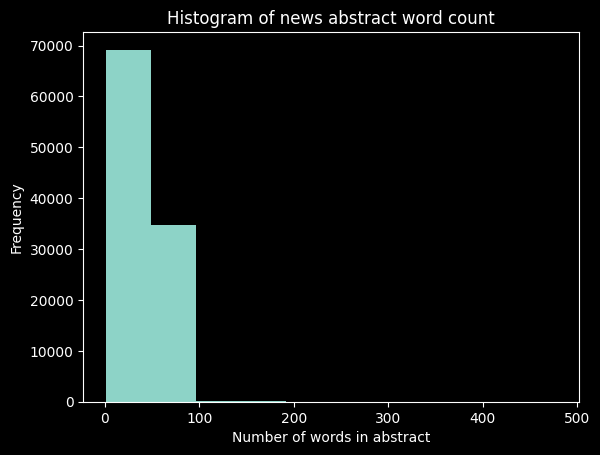

In [51]:
plt.figure()
plt.hist(title_len)
plt.xlabel("Number of words in title")
plt.ylabel("Frequency")
plt.title("Histogram of news title word count")
plt.show()

In [52]:
action=pl.concat([pl.read_parquet('/home/ming/GraduateProject/Data/MINDlarge_train/behaviors_1.parquet'),pl.read_parquet('/home/ming/GraduateProject/Data/MINDlarge_dev/behaviors_1.parquet')],how='vertical')

In [53]:
action.columns

['id', 'user_id', 'time', 'history', 'impressions']

In [54]:
clicks = (
    action
    .select(["time", "impressions"])
    .explode("impressions")
    .with_columns([
        pl.col("impressions")
          .str.split("-")
          .list.get(0)
          .alias("article_id"),
        pl.col("impressions")
          .str.split("-")
          .list.get(1)
          .cast(pl.Int8)
          .alias("label"),
    ])
    .filter(pl.col("label") == 1)
)

In [55]:
clicks.head()

time,impressions,article_id,label
datetime[μs],str,str,i8
2019-11-10 11:30:54,"""N94157-1""","""N94157""",1
2019-11-10 11:30:54,"""N78699-1""","""N78699""",1
2019-11-10 11:30:54,"""N71090-1""","""N71090""",1
2019-11-10 11:30:54,"""N31174-1""","""N31174""",1
2019-11-12 13:45:29,"""N25587-1""","""N25587""",1


In [56]:
article_click_time = (
    clicks
    .group_by("article_id")
    .agg([
        pl.min("time").alias("first_click_time"),
        pl.max("time").alias("last_click_time"),
        pl.count().alias("click_cnt"),
    ]).with_columns(
        (pl.col("last_click_time") - pl.col("first_click_time"))
        .alias("click_interval")
    )
)

article_click_time = article_click_time.with_columns(
    (pl.col("click_interval").dt.total_seconds() / 86400)
    .alias("click_interval_days")
)

/tmp/ipykernel_9242/387402367.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("click_cnt"),


In [57]:
article_click_time

article_id,first_click_time,last_click_time,click_cnt,click_interval,click_interval_days
str,datetime[μs],datetime[μs],u32,duration[μs],f64
"""N10552""",2019-11-09 09:49:41,2019-11-09 11:41:35,2,1h 51m 54s,0.077708
"""N45762""",2019-11-13 10:23:53,2019-11-13 10:44:03,2,20m 10s,0.014005
"""N2371""",2019-11-13 05:55:13,2019-11-13 06:01:51,2,6m 38s,0.004606
"""N69462""",2019-11-15 07:23:46,2019-11-15 10:11:27,10,2h 47m 41s,0.116447
"""N68944""",2019-11-11 10:42:08,2019-11-11 12:05:00,15,1h 22m 52s,0.057546
…,…,…,…,…,…
"""N14860""",2019-11-12 17:39:32,2019-11-12 17:39:32,1,0µs,0.0
"""N9433""",2019-11-09 17:22:35,2019-11-12 18:56:55,964,3d 1h 34m 20s,3.065509
"""N85677""",2019-11-11 09:45:02,2019-11-11 09:45:02,1,0µs,0.0


In [59]:
article_click_time = article_click_time.filter(
    pl.col("click_interval_days") > 0
)

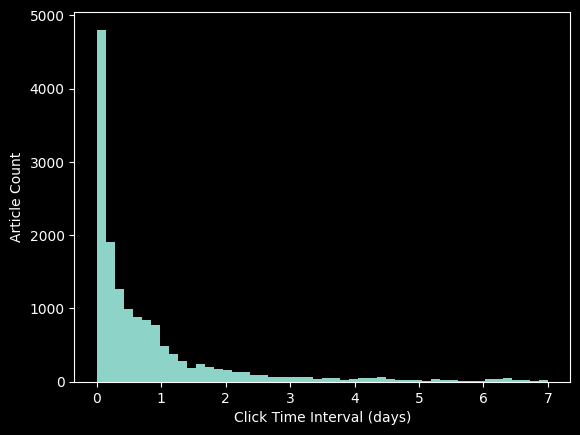

In [61]:
import matplotlib.pyplot as plt

intervals = article_click_time["click_interval_days"].to_numpy()

plt.figure()
plt.hist(intervals, bins=50)
plt.xlabel("Click Time Interval (days)")
plt.ylabel("Article Count")
plt.show()


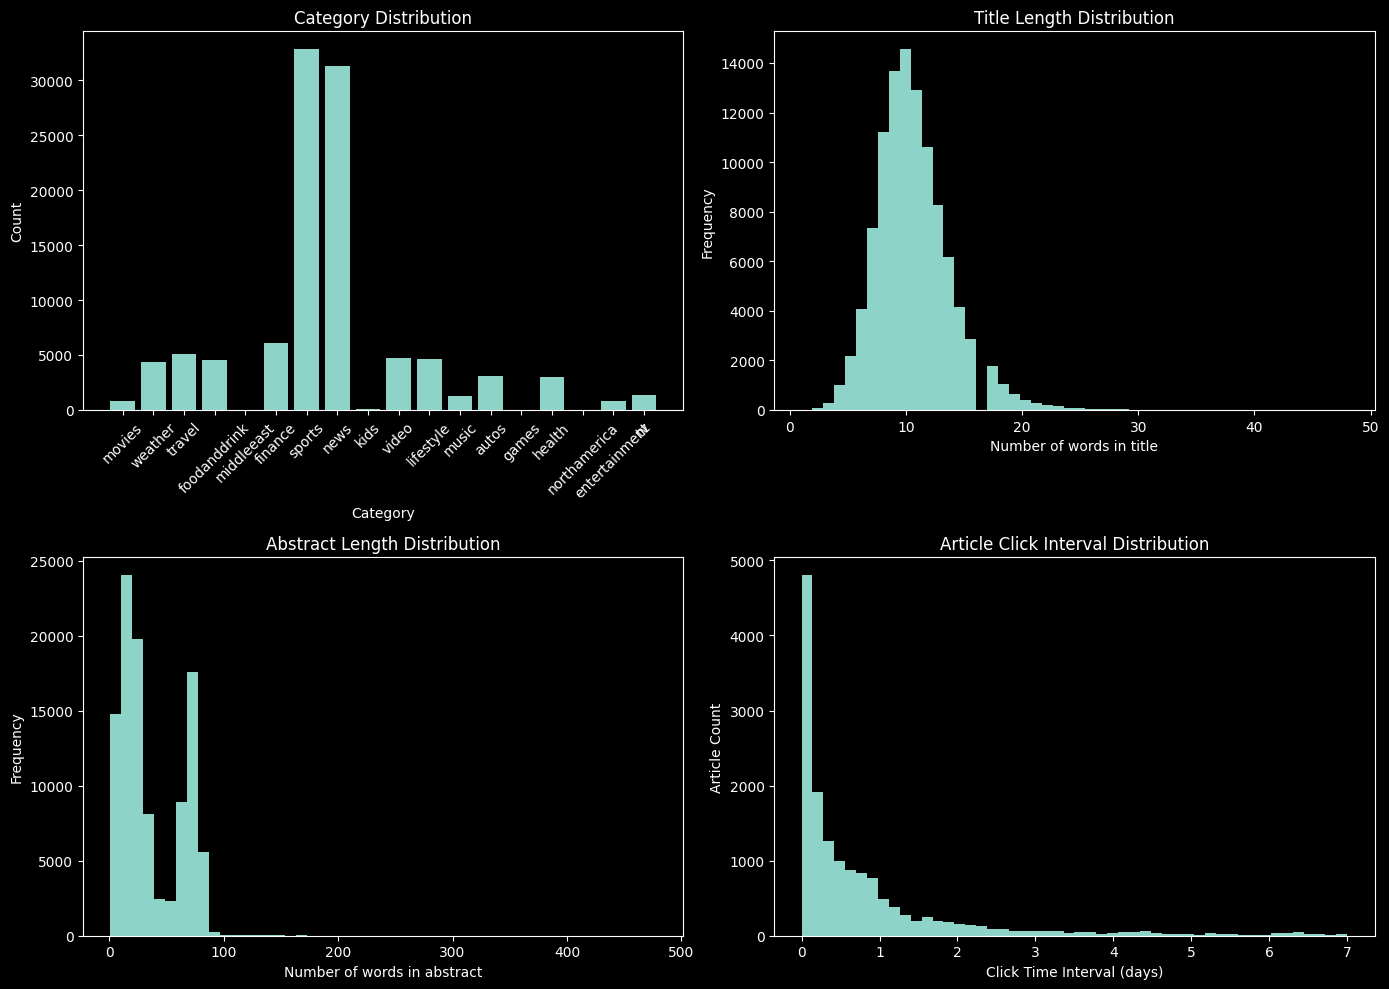

In [62]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Category distribution
axes[0, 0].bar(categories, counts)
axes[0, 0].set_xlabel("Category")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_title("Category Distribution")
axes[0, 0].tick_params(axis="x", rotation=45)

# 2. Title length distribution
axes[0, 1].hist(title_len.to_numpy(), bins=50)
axes[0, 1].set_xlabel("Number of words in title")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Title Length Distribution")

# 3. Abstract length distribution
axes[1, 0].hist(abstract_len.to_numpy(), bins=50)
axes[1, 0].set_xlabel("Number of words in abstract")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Abstract Length Distribution")

# 4. Click interval (days) distribution
axes[1, 1].hist(intervals, bins=50)
axes[1, 1].set_xlabel("Click Time Interval (days)")
axes[1, 1].set_ylabel("Article Count")
axes[1, 1].set_title("Article Click Interval Distribution")

plt.tight_layout()
plt.show()
